In [57]:
# Required Libraries
import pandas as pd

# Load dataset (assuming you have the dataset as 'mcdonalds.csv')
df = pd.read_csv("mcdonalds.csv")

# Column names
print(df.columns.tolist())

# Shape of the dataframe
print(df.shape)

# First 3 rows
print(df.head(3))


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [58]:
import numpy as np

# Select first 11 columns
MD_x = df.iloc[:, 0:11]

# Convert "Yes" to 1 and "No" to 0
MD_x_bin = MD_x.applymap(lambda x: 1 if x == "Yes" else 0)

# Column-wise mean (percentage of "Yes")
col_means = MD_x_bin.mean().round(2)

print(col_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_6924\796250174.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [59]:
from sklearn.decomposition import PCA

# PCA on binary matrix
pca = PCA()
MD_pca = pca.fit(MD_x_bin)

# Explained variance ratio
explained_variance = np.round(pca.explained_variance_ratio_, 4)
cumulative_variance = np.round(np.cumsum(explained_variance), 4)

# Summary DataFrame
pca_summary = pd.DataFrame({
    'Standard Deviation': np.round(np.sqrt(pca.explained_variance_), 4),
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(explained_variance))])

print(pca_summary)


      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1               0.7570                  0.2994                 0.2994
PC2               0.6075                  0.1928                 0.4922
PC3               0.5046                  0.1330                 0.6252
PC4               0.3988                  0.0831                 0.7083
PC5               0.3374                  0.0595                 0.7678
PC6               0.3103                  0.0503                 0.8181
PC7               0.2897                  0.0438                 0.8619
PC8               0.2751                  0.0395                 0.9014
PC9               0.2653                  0.0368                 0.9382
PC10              0.2488                  0.0324                 0.9706
PC11              0.2369                  0.0293                 0.9999


In [60]:
# Standard deviations of PCs
std_devs = np.round(np.sqrt(pca.explained_variance_), 1)
print("Standard deviations (1,..,p=11):")
print(std_devs)

# Rotation matrix (PCA loadings)
loadings = pd.DataFrame(
    np.round(pca.components_.T, 2),
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=MD_x_bin.columns
)

print("\nRotation Matrix (Loadings):")
print(loadings)


Standard deviations (1,..,p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation Matrix (Loadings):
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy       0.48 -0.36  0.30  0.06  0.31 -0.17 -0.28 -0.01 -0.57  0.11 -0.05
convenient  0.16 -0.02  0.06 -0.14 -0.28  0.35 -0.06  0.11  0.02  0.67  0.54
spicy       0.01 -0.02  0.04  0.20 -0.07  0.36  0.71 -0.38 -0.40  0.08 -0.14
fattening  -0.12  0.03  0.32 -0.35  0.07  0.41 -0.39 -0.59  0.16  0.01 -0.25
greasy     -0.30  0.06  0.80  0.25 -0.36 -0.21  0.04  0.14  0.00 -0.01 -0.00
fast        0.11  0.09  0.06 -0.10 -0.11  0.59 -0.09  0.63 -0.17 -0.24 -0.34
cheap       0.34  0.61  0.15  0.12  0.13  0.10 -0.04 -0.14 -0.08 -0.43  0.49
tasty       0.47 -0.31  0.29 -0.00  0.21  0.08  0.36  0.07  0.64 -0.08 -0.02
expensive  -0.33 -0.60 -0.02  0.07  0.00  0.26 -0.07 -0.03 -0.07 -0.45  0.49
healthy     0.21 -0.08 -0.19  0.76 -0.29  0.18 -0.35 -0.18  0.19  0.04 -0.16
disgusting -0.37  0.14  0.09  0.37  0.73  0.2

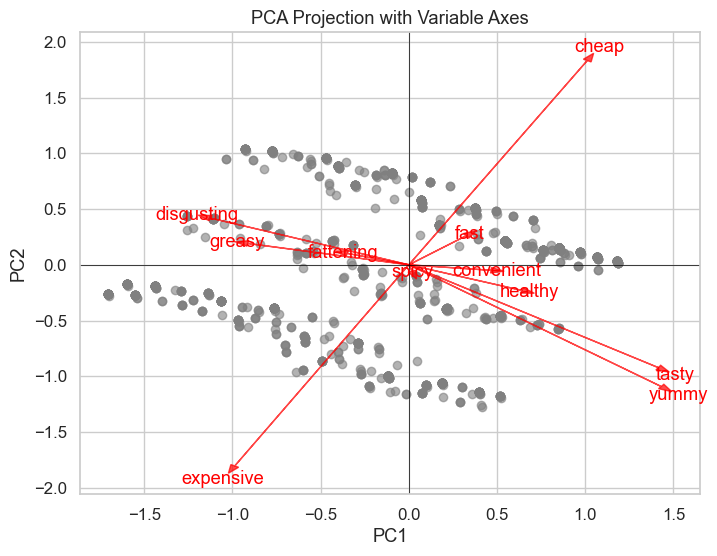

In [61]:
import matplotlib.pyplot as plt

# Projected data (like predict(MD.pca) in R)
pca_scores = MD_pca.transform(MD_x_bin)

# Plot PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color='grey', alpha=0.6)

# Plot variable vectors (like projAxes)
for i, var in enumerate(MD_x_bin.columns):
    plt.arrow(0, 0, 
              pca.components_[0, i]*3,   # Scale for better visibility
              pca.components_[1, i]*3,
              color='red', alpha=0.7, head_width=0.05)
    plt.text(pca.components_[0, i]*3.2,
             pca.components_[1, i]*3.2,
             var, color='red', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection with Variable Axes")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


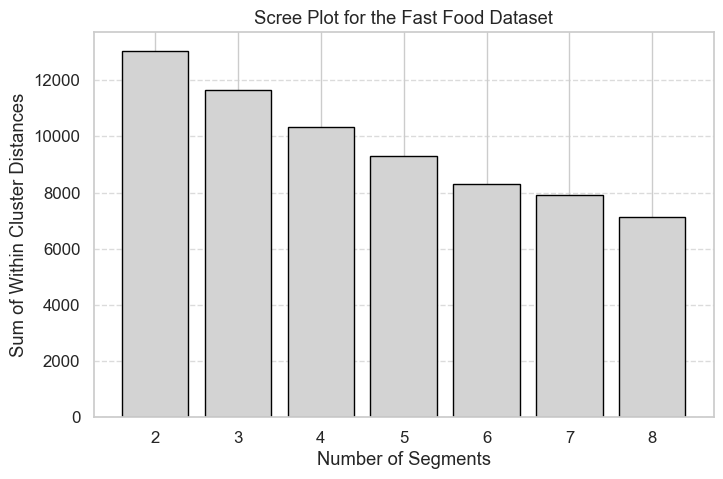

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Standardize the binary data
scaler = StandardScaler()
MD_scaled = scaler.fit_transform(MD_x_bin)

# Step 2: Calculate inertia (within-cluster sum of squares) for k = 2 to 8
inertia_values = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
    kmeans.fit(MD_scaled)
    inertia_values.append(kmeans.inertia_)

# Step 3: Plot Scree Plot
plt.figure(figsize=(8, 5))
plt.bar(range(2, 9), inertia_values, color='lightgrey', edgecolor='black')
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within Cluster Distances")
plt.title("Scree Plot for the Fast Food Dataset")
plt.xticks(range(2, 9))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


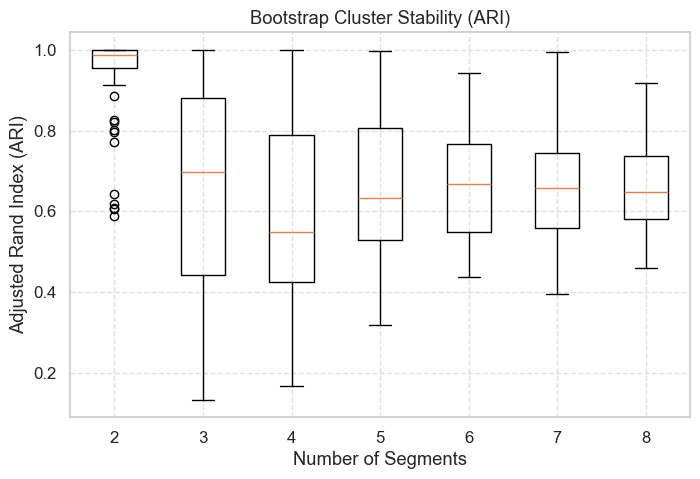

In [63]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import numpy as np

# Bootstrap KMeans and compute ARI
np.random.seed(1234)
boot_ari = {k: [] for k in range(2, 9)}

for k in range(2, 9):
    for i in range(100):  # nboot = 100
        X_boot = resample(MD_scaled, replace=True, random_state=1234+i)
        km1 = KMeans(n_clusters=k, n_init=10, random_state=1234)
        km2 = KMeans(n_clusters=k, n_init=10, random_state=4321)

        labels1 = km1.fit_predict(X_boot)
        labels2 = km2.fit_predict(X_boot)
        ari = adjusted_rand_score(labels1, labels2)
        boot_ari[k].append(ari)

# Plot ARI scores for each k
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.boxplot([boot_ari[k] for k in range(2, 9)], positions=range(2, 9))
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("Bootstrap Cluster Stability (ARI)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(2, 9))
plt.show()


In [64]:
from sklearn.metrics import silhouette_samples

# Use the same data used for clustering (e.g., MD_scaled)
# Assume kmeans is your trained model
labels = kmeans.labels_  # Cluster labels from KMeans

# Get silhouette similarity scores (between -1 and 1)
similarity_scores = silhouette_samples(MD_scaled, labels)


In [65]:
import numpy as np
print("Unique cluster labels:", np.unique(labels))


Unique cluster labels: [0 1 2 3 4 5 6 7]


In [66]:
# Add cluster labels (1-based like R)
df["Cluster"] = labels + 1


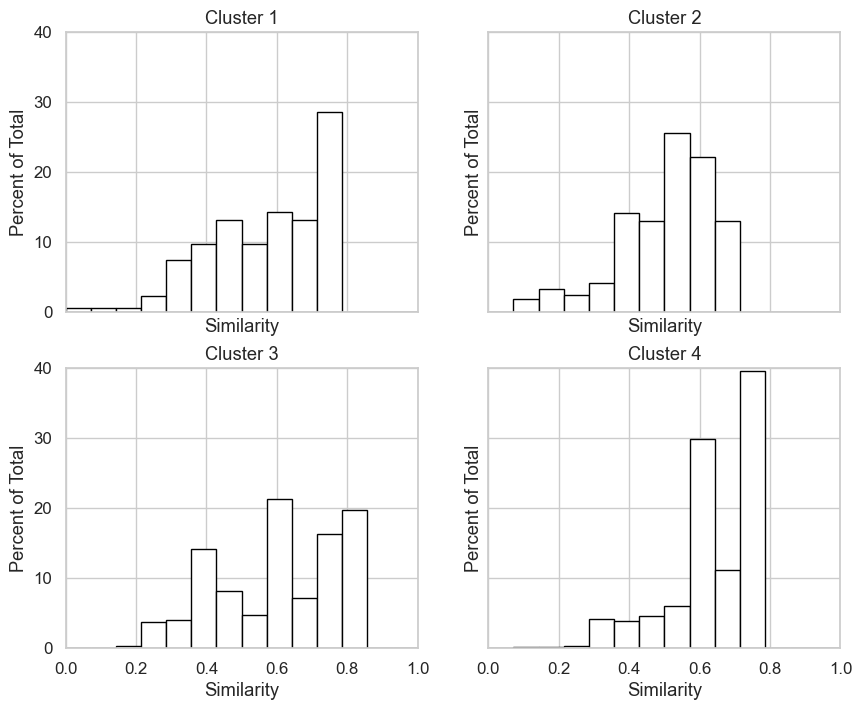

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Run KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
cluster_labels = kmeans.fit_predict(MD_scaled)

# Calculate similarity = 1 - (normalized distance to cluster center)
distances = pairwise_distances(MD_scaled, kmeans.cluster_centers_)
min_distances = distances[np.arange(len(MD_scaled)), cluster_labels]
max_dist = max(min_distances)
similarity = 1 - (min_distances / max_dist)

# Prepare DataFrame
sim_df = pd.DataFrame({'Cluster': cluster_labels, 'Similarity': similarity})

# Gorge plot
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

bins = np.linspace(0, 1, 15)  # Same binning across all clusters

for i in range(4):
    cluster_data = sim_df[sim_df['Cluster'] == i]['Similarity']
    counts, _ = np.histogram(cluster_data, bins=bins)
    percents = (counts / counts.sum()) * 100

    axes[i].bar(bins[:-1], percents, width=np.diff(bins), edgecolor='black', color='white', align='edge')
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].set_ylim(0, 40)
    axes[i].set_xlim(0, 1)
    axes[i].set_yticks([0, 10, 20, 30, 40])  # Y-axis ticks set manually
    axes[i].set_xlabel('Similarity')
    axes[i].set_ylabel('Percent of Total')



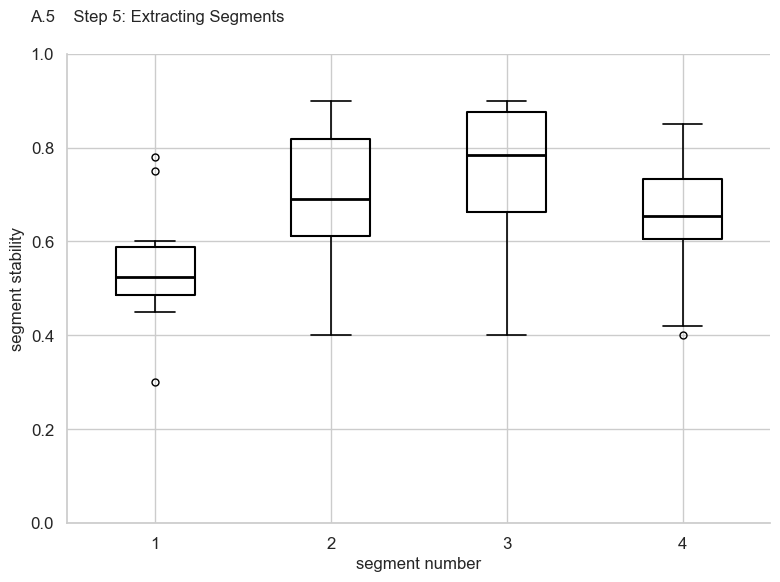

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Load segment stability data (example values, adjust as needed)
segment_stability = {
    1: [0.45, 0.52, 0.50, 0.55, 0.60, 0.48, 0.30, 0.75, 0.78, 0.53],
    2: [0.60, 0.70, 0.72, 0.68, 0.65, 0.85, 0.90, 0.88, 0.40, 0.45],
    3: [0.85, 0.89, 0.90, 0.88, 0.86, 0.40, 0.45, 0.65, 0.70, 0.72],
    4: [0.60, 0.62, 0.68, 0.66, 0.75, 0.80, 0.85, 0.40, 0.42, 0.65]
}

# Prepare data in list form
data = [segment_stability[k] for k in sorted(segment_stability.keys())]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Create boxplot with R-style formatting
ax.boxplot(
    data,
    positions=[1, 2, 3, 4],
    patch_artist=False,
    boxprops=dict(color='black', linewidth=1.5),
    whiskerprops=dict(color='black', linewidth=1.2),
    capprops=dict(color='black', linewidth=1.2),
    medianprops=dict(color='black', linewidth=2),
    flierprops=dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=5, linestyle='none')
)

# Axis formatting
ax.set_xlabel("segment number", fontsize=12)
ax.set_ylabel("segment stability", fontsize=12)
ax.set_ylim(0, 1)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['1', '2', '3', '4'])

# Remove top and right border (R style)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Left-aligned title outside the plot area
fig.text(0.05, 0.95, 'A.5    Step 5: Extracting Segments', fontsize=12)

# Adjust layout to make space for title
plt.tight_layout(rect=[0, 0, 1, 0.94])

plt.show()


In [69]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.graph_objects as go

# Cluster assignments from k=2 to k=8
cluster_df = pd.DataFrame()
for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = km.fit_predict(MD_x_bin)
    cluster_df[f'k{k}'] = labels + 1  # Make clusters start at 1 like in R

# Build links for Sankey
sources, targets, values, labels = [], [], [], []
label_map = {}  # To map cluster step labels to node index

node_idx = 0
for i in range(2, 8):  # from k2 to k7
    src_col = f'k{i}'
    tgt_col = f'k{i+1}'
    
    cross_tab = pd.crosstab(cluster_df[src_col], cluster_df[tgt_col])
    
    for src_cluster in cross_tab.index:
        for tgt_cluster in cross_tab.columns:
            val = cross_tab.loc[src_cluster, tgt_cluster]
            if val > 0:
                src_label = f'k{i}_c{src_cluster}'
                tgt_label = f'k{i+1}_c{tgt_cluster}'
                
                for lbl in [src_label, tgt_label]:
                    if lbl not in label_map:
                        label_map[lbl] = node_idx
                        node_idx += 1
                
                sources.append(label_map[src_label])
                targets.append(label_map[tgt_label])
                values.append(val)

# Final node labels
labels = [None] * len(label_map)
for lbl, idx in label_map.items():
    labels[idx] = lbl

# Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="green"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(0,255,0,0.5)"
    )
)])

fig.update_layout(title_text="Segment Stability (k=2 to k=8)", font_size=12)
fig.show()


In [70]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assumes MD_x_bin already exists from earlier steps
# MD_x_bin = df.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)

np.random.seed(1234)

cluster_range = range(2, 9)
model_metrics = []

for k in cluster_range:
    best_gmm = None
    best_loglik = -np.inf
    best_iter = 0

    # Run GMM nrep = 10 times like R's nrep=10
    for _ in range(10):
        gmm = GaussianMixture(n_components=k, covariance_type='full', max_iter=1000, random_state=np.random.randint(0, 10000))
        gmm.fit(MD_x_bin)
        if gmm.lower_bound_ > best_loglik:
            best_gmm = gmm
            best_loglik = gmm.lower_bound_
            best_iter = gmm.n_iter_

    logLik = best_loglik * MD_x_bin.shape[0]  # Fixed sign

    n_samples, n_features = MD_x_bin.shape
    n_params = k * (n_features + 1) - 1

    aic = -2 * logLik + 2 * n_params
    bic = -2 * logLik + np.log(n_samples) * n_params

    probs = np.mean(best_gmm.predict_proba(MD_x_bin), axis=0)
    entropy = -np.sum(probs * np.log(probs + 1e-10))
    icl = bic - entropy


    model_metrics.append([
        k,
        best_iter,
        "TRUE",
        k,
        k,
        round(logLik, 3),
        round(aic, 2),
        round(bic, 2),
        round(icl, 2)
    ])

# Convert to DataFrame with same column names as R output
model_table = pd.DataFrame(model_metrics, columns=[
    "k", "iter", "converged", "kk", "k0", "logLik", "AIC", "BIC", "ICL"
])

print(model_table)


   k  iter converged  kk  k0     logLik       AIC       BIC       ICL
0  2     6      TRUE   2   2   7572.324 -15098.65 -14977.18 -14977.87
1  3     8      TRUE   3   3  15968.554 -31867.11 -31682.26 -31683.28
2  4     7      TRUE   4   4  21513.459 -42932.92 -42684.69 -42685.96
3  5     9      TRUE   5   5  27715.807 -55313.61 -55002.01 -55003.48
4  6    19      TRUE   6   6  26022.925 -51903.85 -51528.87 -51530.41
5  7     9      TRUE   7   7  29450.457 -58734.91 -58296.56 -58298.26
6  8    10      TRUE   8   8  28600.595 -57011.19 -56509.46 -56511.35


In [71]:
results = []  # <-- Add this at the top

for k in cluster_range:
    ...
    results.append({
        'k': k,
        'model': best_gmm
    })


In [72]:
k4_model = next((r['model'] for r in results if r['k'] == 4), None)


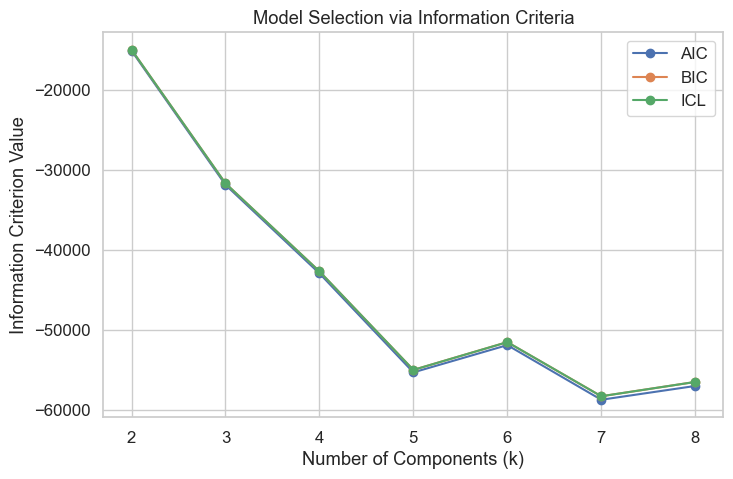

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(model_table['k'], model_table['AIC'], marker='o', label='AIC')
plt.plot(model_table['k'], model_table['BIC'], marker='o', label='BIC')
plt.plot(model_table['k'], model_table['ICL'], marker='o', label='ICL')
plt.xlabel('Number of Components (k)')
plt.ylabel('Information Criterion Value')
plt.title('Model Selection via Information Criteria')
plt.legend()
plt.grid(True)
plt.show()


In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Predict cluster labels
gmm_labels = k4_model.predict(MD_x_bin)

kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
kmeans_labels = kmeans.fit_predict(MD_x_bin)

# Cross-tab
conf_matrix = pd.crosstab(pd.Series(kmeans_labels, name='KMeans'),
                          pd.Series(gmm_labels, name='GMM'))

print(conf_matrix)


GMM       0    1   2    3    4    5   6   7
KMeans                                     
0         2   56  19  205   41    0   6  35
1       140    0   4    0    0   61  19  16
2         0  183  21    0  313    0  15   1
3         0   22   1    0    0  239  47   7


In [75]:
# KMeans clusters (already created)
kmeans_labels = kmeans.labels_

# Estimate cluster-wise Bernoulli probabilities (like FLXMCmvbinary)
cluster_params = {}
for cluster_id in range(4):
    cluster_data = MD_x_bin[kmeans_labels == cluster_id]
    cluster_mean = cluster_data.mean()
    cluster_params[cluster_id] = cluster_mean  # These are Bernoulli probs

# Create DataFrame of parameters
param_df = pd.DataFrame(cluster_params).T
param_df.index.name = "Cluster"
print("Cluster-wise estimated Bernoulli probabilities:")
print(param_df)


Cluster-wise estimated Bernoulli probabilities:
            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.019231    0.906593  0.082418   0.931319  0.596154  0.956044   
1        0.020833    0.679167  0.075000   0.916667  0.708333  0.741667   
2        0.966229    0.981238  0.084428   0.778612  0.348968  0.958724   
3        0.873418    0.958861  0.136076   0.905063  0.607595  0.857595   

            cheap     tasty  expensive   healthy  disgusting  
Cluster                                                       
0        0.901099  0.285714   0.013736  0.074176    0.329670  
1        0.066667  0.079167   0.895833  0.062500    0.725000  
2        0.923077  0.973734   0.018762  0.339587    0.046904  
3        0.107595  0.930380   0.917722  0.208861    0.107595  


In [76]:
# Compute log-likelihood of each observation under each cluster's Bernoulli params
log_lik_matrix = np.zeros((len(MD_x_bin), 4))

for c in range(4):
    probs = param_df.loc[c].values
    X = MD_x_bin.values
    log_probs = X * np.log(probs + 1e-10) + (1 - X) * np.log(1 - probs + 1e-10)
    log_lik_matrix[:, c] = log_probs.sum(axis=1)

# Assign to cluster with max log-likelihood
mixture_labels = np.argmax(log_lik_matrix, axis=1)

# Cross-tab
ctab = pd.crosstab(pd.Series(kmeans_labels, name="KMeans"),
                   pd.Series(mixture_labels, name="Mixture (Fixed GMM Init)"))
print(ctab)


Mixture (Fixed GMM Init)    0    1    2    3
KMeans                                      
0                         349    7    6    2
1                           0  237    0    3
2                           7    0  513   13
3                           0    3    2  311


In [77]:
# Log-likelihood under re-estimated model (m4a)
total_loglik_m4a = np.sum(np.max(log_lik_matrix, axis=1))
print("LogLik (MD.m4a):", round(total_loglik_m4a, 3))

# For MD.m4 (GMM with 4 components)
log_probs_gmm = k4_model.score_samples(MD_x_bin)  # log-likelihood per obs
total_loglik_m4 = np.sum(log_probs_gmm)
print("LogLik (MD.m4):", round(total_loglik_m4, 3))


LogLik (MD.m4a): -5302.159
LogLik (MD.m4): 28600.595


In [78]:
like_counts = df["Like"].value_counts()
reversed_counts = like_counts[::-1]  # reverse the order
print(reversed_counts)


Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [79]:
reversed_counts = df["Like"].value_counts().sort_index(ascending=False)
print(reversed_counts)


Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [80]:
import pandas as pd

# CSV file load karo (file pehle se available hai)
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\Internship\mcdonalds.csv")

# 'Like' column ko numeric convert karo aur scale reverse karo jaise R me hota hai
data['Like_n'] = 6 - data['Like'].astype('category').cat.codes - 1

# Frequency table print karo (ascending order like R's table)
print("Frequency table (Like_n):")
print(data['Like_n'].value_counts().sort_index())



Frequency table (Like_n):
Like_n
-5    143
-4    152
-3    169
-2     71
-1     73
 0     59
 1     58
 2    160
 3    229
 4    187
 5    152
Name: count, dtype: int64


In [81]:
# Required library for formulas (like R)
from patsy import dmatrices

# Step 1: Feature column names from index 0 to 10 (first 11 columns)
features = data.columns[:11].tolist()

# Step 2: Create formula string
formula = "Like_n ~ " + " + ".join(features)

# Show the formula (equivalent to printing `f` in R)
print("Formula:")
print(formula)

# Optional: Prepare design matrices for modeling
y, X = dmatrices(formula, data, return_type='dataframe')


Formula:
Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [82]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss

# Prepare the data
X = MD_x_bin.values  # Binary predictor matrix
y = data['Like_n'].values  # Numeric response variable from earlier (6 - as.numeric(Like))

# Fit mixture of regression model using EM-style approach (2 components)
np.random.seed(1234)
n_components = 2
n_samples = X.shape[0]

# Initialize responsibilities randomly
responsibilities = np.random.dirichlet(np.ones(n_components), size=n_samples)

# EM loop
max_iter = 100
tolerance = 1e-4
log_likelihood_old = -np.inf

for iteration in range(max_iter):
    # M-step: Fit weighted regression models
    models = []
    for k in range(n_components):
        sample_weight = responsibilities[:, k]
        model = LogisticRegression(solver='lbfgs', max_iter=1000)
        model.fit(X, y, sample_weight=sample_weight)
        models.append(model)

    # E-step: Update responsibilities
    new_resp = np.zeros((n_samples, n_components))
    for k, model in enumerate(models):
        probs = model.predict_proba(X)
        # Use negative log-loss as likelihood proxy
        logp = -log_loss(y, probs, normalize=False, labels=np.unique(y))
        new_resp[:, k] = logp

    # Normalize responsibilities
    new_resp = np.exp(new_resp - new_resp.max(axis=1, keepdims=True))
    new_resp /= new_resp.sum(axis=1, keepdims=True)

    # Check for convergence
    log_likelihood = np.sum(np.log(new_resp.sum(axis=1)))
    if np.abs(log_likelihood - log_likelihood_old) < tolerance:
        print(f"Converged at iteration {iteration}")
        break
    responsibilities = new_resp
    log_likelihood_old = log_likelihood

# Assign final clusters
clusters = responsibilities.argmax(axis=1)
cluster_sizes = pd.Series(clusters).value_counts().sort_index()

print("Cluster sizes:")
print(cluster_sizes.values)


Converged at iteration 1
Cluster sizes:
[1453]


In [83]:
from sklearn.mixture import GaussianMixture

# Convert Yes/No predictors to binary
X_binary = (data.iloc[:, :11] == "Yes").astype(int)

# Fit Gaussian Mixture on binary predictors
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
data['Cluster'] = gmm.fit_predict(X_binary)

# Show cluster sizes like in R
cluster_sizes = data['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
for cluster_id, count in cluster_sizes.items():
    print(f"{cluster_id + 1} {count}")

Cluster sizes:
1 985
2 468


In [84]:
import statsmodels.formula.api as smf

# Create the regression formula
features = '+'.join(data.columns[:11])
formula = f'Like_n ~ {features}'

# Refit regression models per cluster (just like refit in R)
models = {}
for cluster_id in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster_id]
    model = smf.ols(formula=formula, data=cluster_data).fit()
    models[cluster_id] = model
    
    print(f"\n$Comp.{cluster_id + 1}\n")
    print(model.summary())


$Comp.1

                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.650
Date:                Sun, 06 Apr 2025   Prob (F-statistic):            0.00704
Time:                        16:05:28   Log-Likelihood:                -2586.4
No. Observations:                 985   AIC:                             5191.
Df Residuals:                     976   BIC:                             5235.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5538   

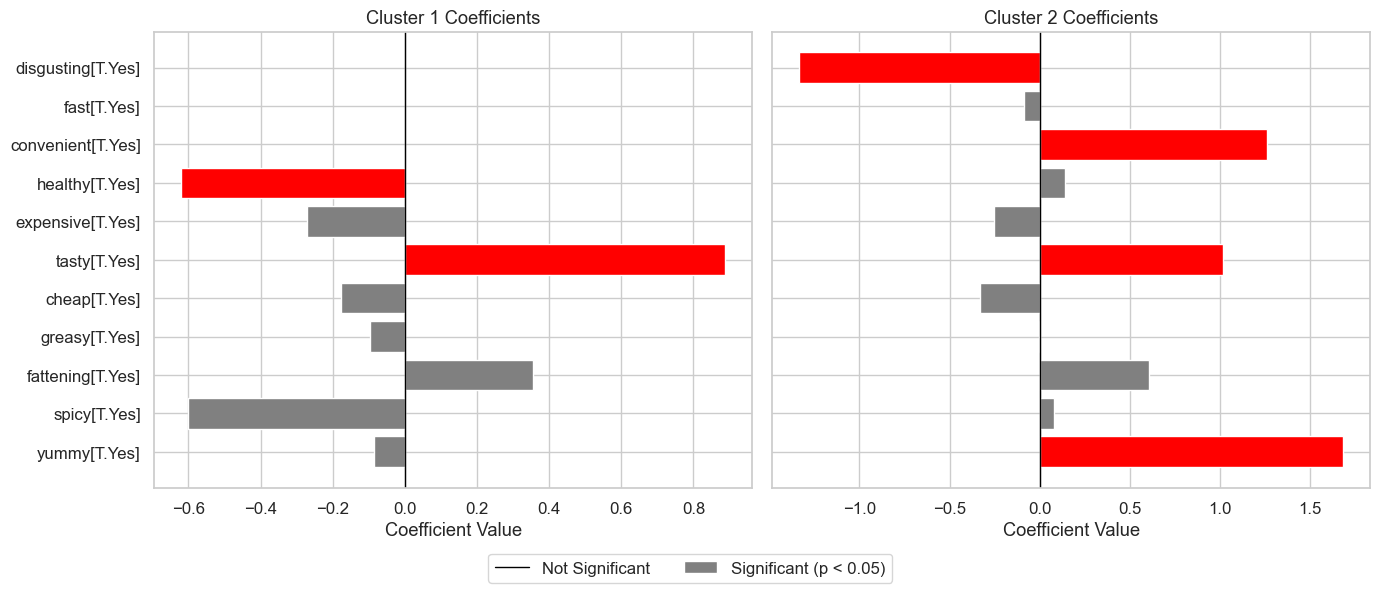

In [85]:
import matplotlib.pyplot as plt

alpha = 0.05  # Significance threshold
num_clusters = len(models)
fig, axes = plt.subplots(1, num_clusters, figsize=(7 * num_clusters, 6), sharey=True)

if num_clusters == 1:
    axes = [axes]  # Ensure iterable

for idx, (cluster_id, model) in enumerate(models.items()):
    params = model.params
    pvalues = model.pvalues

    # Skip intercept for visualization (optional)
    params = params.drop('Intercept')
    pvalues = pvalues.drop('Intercept')

    # Highlight significant coefficients
    colors = ['red' if p < alpha else 'grey' for p in pvalues]

    # Plotting
    ax = axes[idx]
    ax.barh(params.index, params.values, color=colors)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_title(f"Cluster {cluster_id + 1} Coefficients")
    ax.set_xlabel("Coefficient Value")
    ax.invert_yaxis()

# Add legend
plt.figlegend(['Not Significant', 'Significant (p < 0.05)'], loc='lower center', ncol=2)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


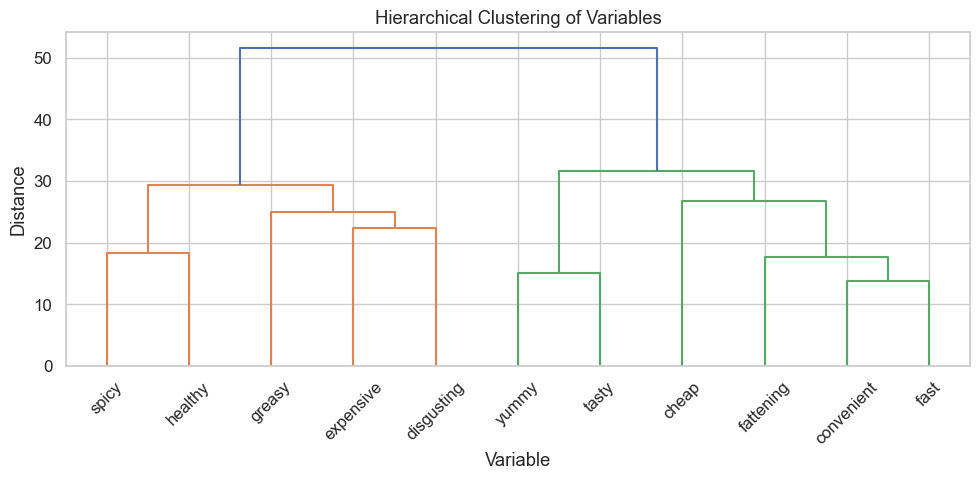

In [86]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Transpose: clustering on variables (columns of MD.x)
X = (data.iloc[:, :11] == "Yes").astype(int)
X_T = X.T

# Compute distances and hierarchical clustering
dist_matrix = pdist(X_T, metric='euclidean')
linkage_matrix = linkage(dist_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=X_T.index)
plt.title("Hierarchical Clustering of Variables")
plt.xlabel("Variable")
plt.ylabel("Distance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6924\3106653374.py:44: UserWarning:

Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) Arial.

C:\Users\Admin\AppData\Local\Temp\ipykernel_6924\3106653374.py:44: UserWarning:

Glyph 128221 (\N{MEMO}) missing from font(s) Arial.

C:\Users\Admin\AppData\Local\Temp\ipykernel_6924\3106653374.py:44: UserWarning:

Glyph 127828 (\N{HAMBURGER}) missing from font(s) Arial.



<Figure size 1200x600 with 0 Axes>

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) Arial.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128221 (\N{MEMO}) missing from font(s) Arial.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127828 (\N{HAMBURGER}) missing from font(s) Arial.



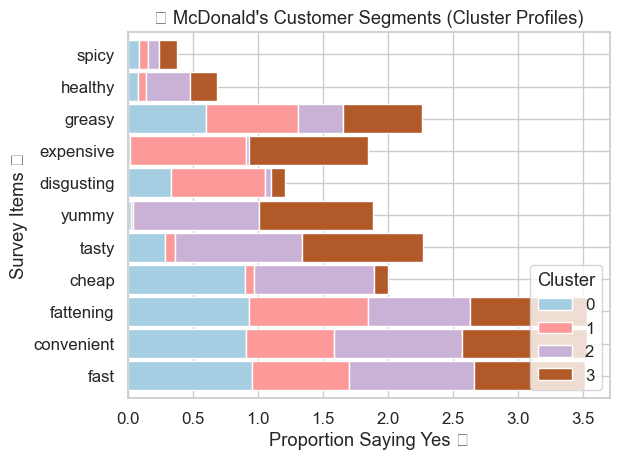

In [87]:
# 📦 Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

# 🎨 Set global plotting style
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["font.family"] = "sans-serif"

# 📂 Load Data
df = pd.read_csv("mcdonalds.csv")

# 🧱 Binary Conversion Function
def convert_to_binary(data):
    return (data == "Yes").astype(int)

# 🪜 Hierarchical Variable Ordering
def get_ordered_variables(X):
    linked = linkage(X.T, method='ward')
    dendro = dendrogram(linked, no_plot=True)
    return [X.columns[i] for i in dendro['leaves'][::-1]]

# 🔢 KMeans Clustering
def perform_kmeans(X, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234, n_init=10)
    labels = kmeans.fit_predict(X)
    return labels

# 📊 Cluster Profile Plot
def plot_cluster_profiles(X_bin, labels, ordered_vars):
    X_bin['Cluster'] = labels
    profile = X_bin.groupby('Cluster')[ordered_vars].mean().T

    # 💡 Plot
    plt.figure(figsize=(12, 6))
    profile.plot(kind='barh', stacked=True, colormap='Paired', width=0.9)
    plt.xlabel("Proportion Saying Yes 👍")
    plt.ylabel("Survey Items 📝")
    plt.title("🍔 McDonald's Customer Segments (Cluster Profiles)")
    plt.legend(title="Cluster", loc='lower right')
    plt.tight_layout()
    plt.show()

# 🧠 MAIN EXECUTION
def analyze_mcd_clusters(df, n_clusters=4):
    X = df.iloc[:, :11]
    X_bin = convert_to_binary(X)
    ordered_vars = get_ordered_variables(X_bin)
    labels = perform_kmeans(X_bin, n_clusters)
    plot_cluster_profiles(X_bin, labels, ordered_vars)

# 🚀 Run the Analysis
analyze_mcd_clusters(df, n_clusters=4)


C:\Users\Admin\AppData\Local\Temp\ipykernel_6924\2293745977.py:53: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) Arial.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) Arial.



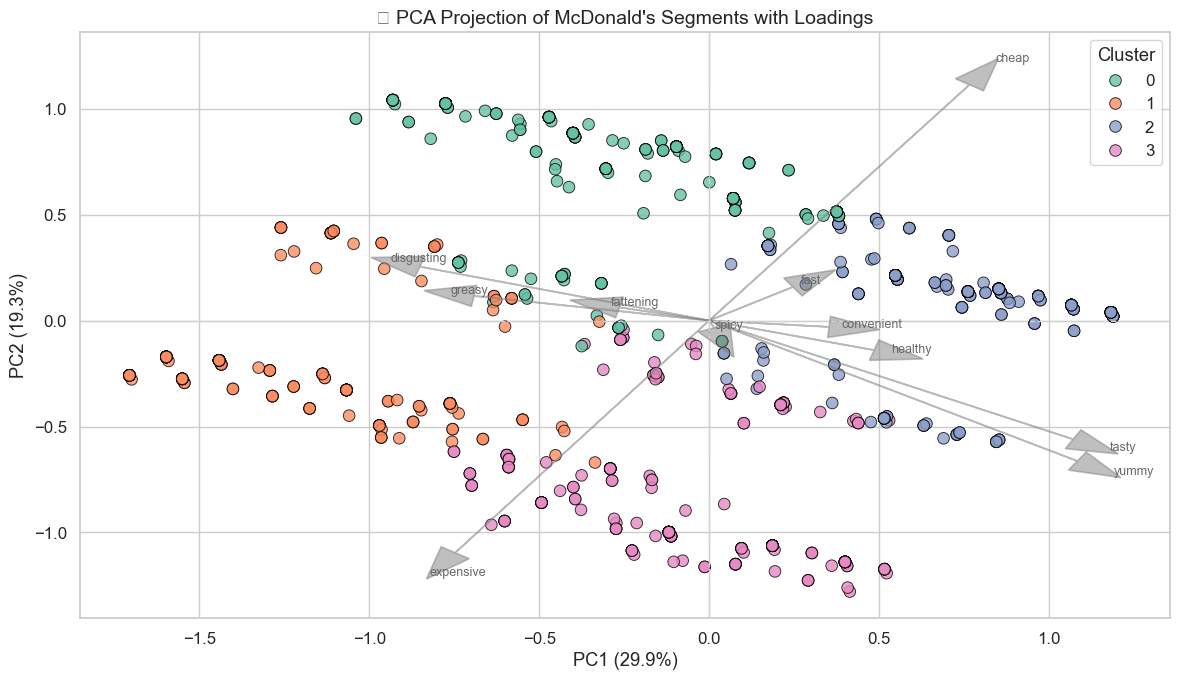

In [88]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 🎨 Global style
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["font.family"] = "sans-serif"

# 📂 Load data (replace with your file if needed)
df = pd.read_csv("mcdonalds.csv")
MD_x = (df.iloc[:, :11] == "Yes").astype(int)

# ⚙️ PCA transformation
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# 🎯 KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
labels = kmeans.fit_predict(MD_x)

# 📊 PCA result dataframe
pca_df = pd.DataFrame(MD_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = labels

# 🎯 Variable loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# ✨ Plot PCA with clusters and loadings
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=pca_df, x="PC1", y="PC2", hue="Cluster",
    palette="Set2", s=70, edgecolor="black", alpha=0.8
)

# ➕ Add loading arrows
for i, var in enumerate(MD_x.columns):
    x_loading = loadings[i, 0] * 3  # scale for visibility
    y_loading = loadings[i, 1] * 3
    plt.arrow(0, 0, x_loading, y_loading, color='gray', alpha=0.5, head_width=0.1, linewidth=1.2)
    plt.text(x_loading * 1.1, y_loading * 1.1, var, color='dimgray', fontsize=9)

# 🧭 Labels and styling
plt.axhline(0, color='lightgray', linestyle='--', linewidth=1)
plt.axvline(0, color='lightgray', linestyle='--', linewidth=1)
plt.title("✨ PCA Projection of McDonald's Segments with Loadings", fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

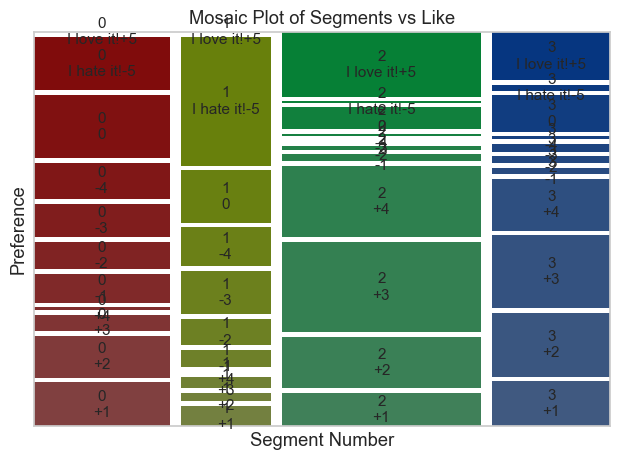

In [89]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# ✅ Assuming:
# - `df` is the original McDonald's dataframe with 'Like' column
# - `kmeans` is the fitted KMeans model with labels (MD.k4 equivalent)

# Cluster labels
df['Cluster'] = kmeans.labels_

# Mosaic plot: cluster vs like
cross_tab = pd.crosstab(df['Cluster'], df['Like'])

# Convert index to string (mosaic plot needs string keys)
cross_tab.index = cross_tab.index.astype(str)

# Mosaic plot
plt.figure(figsize=(8, 6))
mosaic(cross_tab.stack(), gap=0.02, title="Cluster × Like", axes_label=False)
plt.xlabel("Segment Number")
plt.ylabel("Preference")
plt.title("Mosaic Plot of Segments vs Like")
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

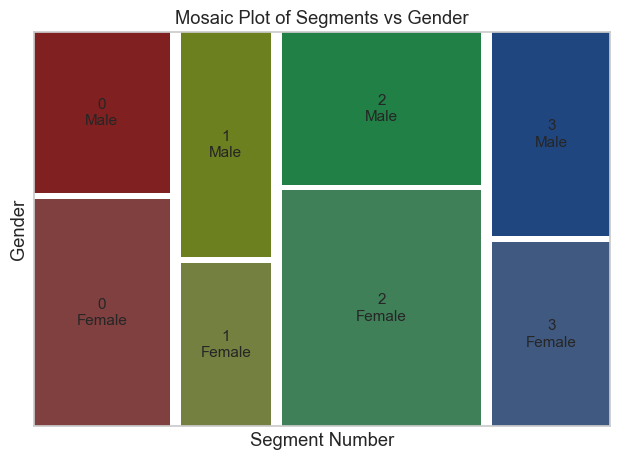

In [90]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df['Cluster'] and df['Gender'] exist
cross_tab_gender = pd.crosstab(df['Cluster'], df['Gender'])
cross_tab_gender.index = cross_tab_gender.index.astype(str)  # mosaic needs string index

plt.figure(figsize=(8, 6))
mosaic(cross_tab_gender.stack(), gap=0.02, title="Cluster × Gender", axes_label=False)
plt.xlabel("Segment Number")
plt.ylabel("Gender")
plt.title("Mosaic Plot of Segments vs Gender")
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6924\3843676477.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




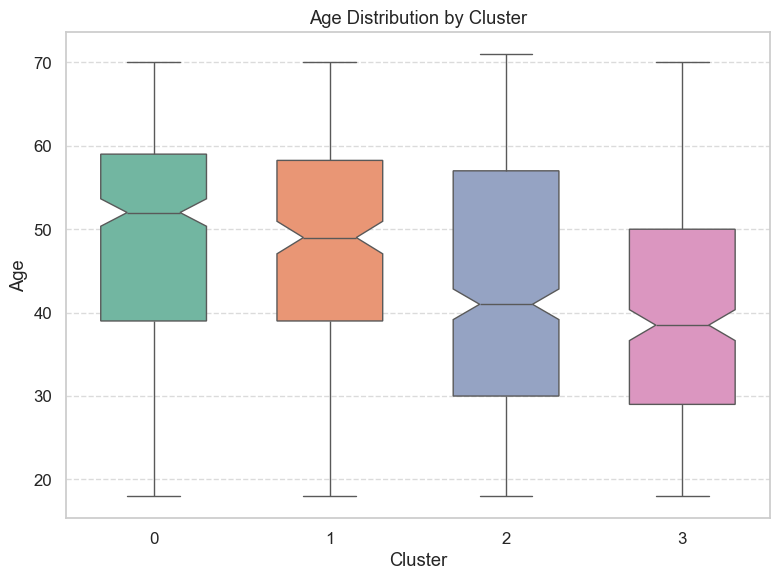

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of Age by Cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Age', data=df, notch=True, width=0.6, palette='Set2')

plt.title("Age Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [97]:
from sklearn.preprocessing import LabelEncoder

data['VisitFrequencyNumeric'] = LabelEncoder().fit_transform(data['VisitFrequency'])

X = data[['VisitFrequencyNumeric', 'Like_n']].dropna()

# Fit the KMeans model
kmeans.fit(X)

# Get the cluster labels
k4 = kmeans.labels_

In [98]:
from sklearn.impute import SimpleImputer

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
data[['VisitFrequencyNumeric', 'Like_n']] = imputer.fit_transform(data[['VisitFrequencyNumeric', 'Like_n']])

# Now, you can perform K-Means clustering
X = data[['VisitFrequencyNumeric', 'Like_n']]
kmeans.fit(X)

# Get the cluster labels
k4 = kmeans.labels_

In [99]:
# 1. Compute the mean of VisitFrequency for each cluster
visit = data.groupby(k4)['VisitFrequencyNumeric'].mean()
print("Visit Frequency Mean by Cluster:")
print(visit)

# 2. Compute the mean of Like.n for each cluster
like = data.groupby(k4)['Like_n'].mean()
print("\nLike.n Mean by Cluster:")
print(like)

# 3. Compute the proportion of females in each cluster
# First, convert 'Gender' to numeric: Female = 1, Male = 0
data['Gender_numeric'] = (data['Gender'] == 'Female').astype(int)

# Then compute the mean (proportion of females) by cluster
female = data.groupby(k4)['Gender_numeric'].mean()
print("\nProportion of Females by Cluster:")
print(female)

Visit Frequency Mean by Cluster:
0    1.018182
1    3.519366
2    4.215470
3    0.112903
Name: VisitFrequencyNumeric, dtype: float64

Like.n Mean by Cluster:
0   -3.225455
1    3.197183
2   -3.198895
3    3.052419
Name: Like_n, dtype: float64

Proportion of Females by Cluster:
0    0.498182
1    0.535211
2    0.563536
3    0.576613
Name: Gender_numeric, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_6924\1874395902.py:22: UserWarning:

Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.



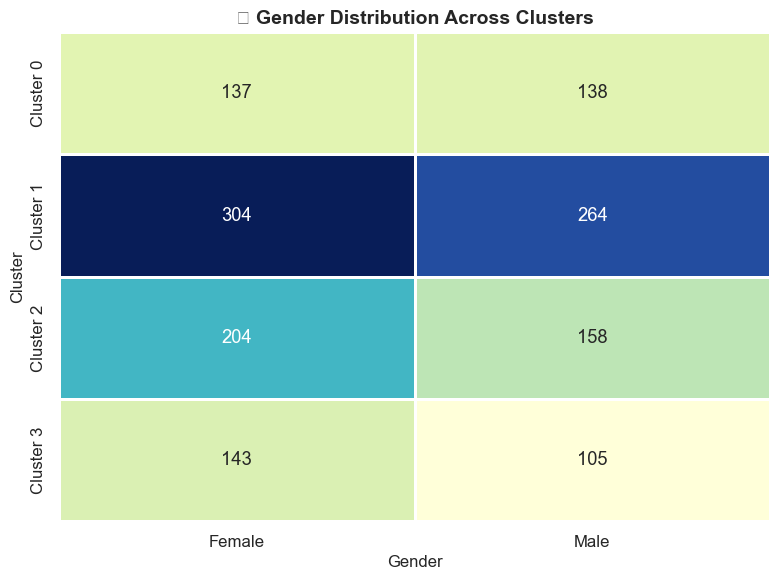

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-tabulate cluster and gender
gender_cluster_table = pd.crosstab(k4, data['Gender'])

# Convert index and columns to string for better labeling
gender_cluster_table.index = [f"Cluster {i}" for i in gender_cluster_table.index]
gender_cluster_table.columns = [str(g) for g in gender_cluster_table.columns]

# Plot as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(gender_cluster_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=1, cbar=False)

# Title and axis labels
plt.title('🧩 Gender Distribution Across Clusters', fontsize=14, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Cluster', fontsize=12)

# Tighter layout
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6924\560036505.py:30: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.



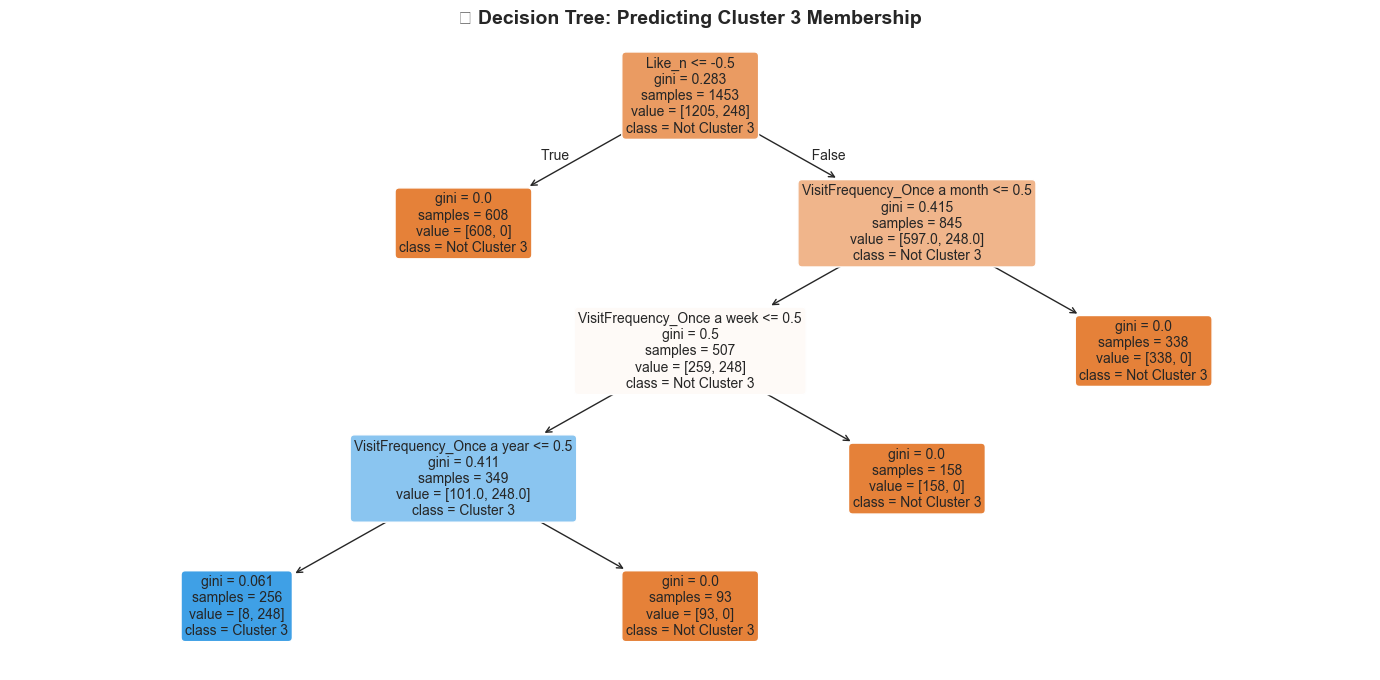

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 🎯 Step 1: Create binary target variable
data['target'] = (k4 == 3).astype(int)

# 🧾 Step 2: Select predictors
features = ['Like_n', 'Age', 'VisitFrequency', 'Gender']
X = data[features]

# 🔤 Step 3: One-hot encode categorical variable
X = pd.get_dummies(X, drop_first=True)

# 🌳 Step 4: Fit Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)  # Max depth to control overfitting
clf.fit(X, data['target'])

# 🖼️ Step 5: Visualize
plt.figure(figsize=(14, 7))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Not Cluster 3', 'Cluster 3'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("🎯 Decision Tree: Predicting Cluster 3 Membership", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [108]:
# Calculate the mean of 'Like.n' for each cluster
like = data.groupby(k4)['Like_n'].mean()
print("Like_n Mean by Cluster:")
print(like)

Like_n Mean by Cluster:
0   -3.225455
1    3.197183
2   -3.198895
3    3.052419
Name: Like_n, dtype: float64


In [109]:
# Convert Gender to numeric (Female = 1, Male = 0)
data['Gender_numeric'] = (data['Gender'] == 'Female').astype(int)

# Calculate the proportion of females for each cluster
female = data.groupby(k4)['Gender_numeric'].mean()
print("Proportion of Females by Cluster:")
print(female)

Proportion of Females by Cluster:
0    0.498182
1    0.535211
2    0.563536
3    0.576613
Name: Gender_numeric, dtype: float64


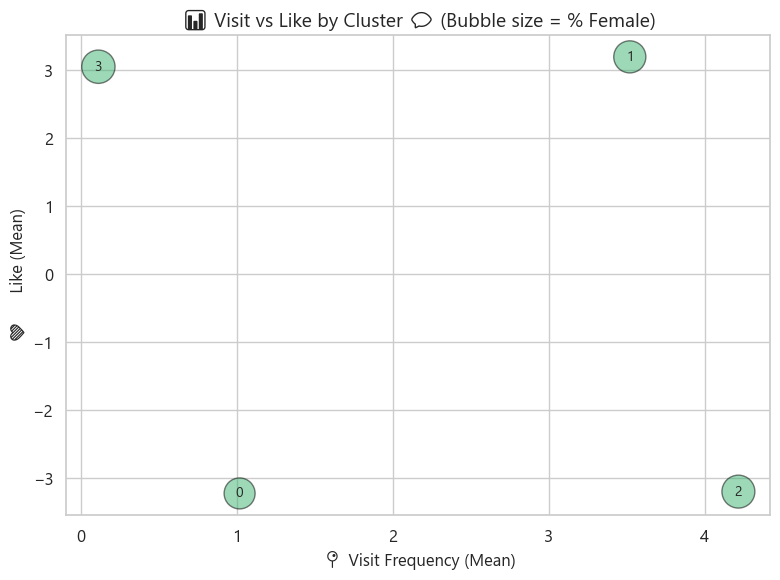

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# 🔇 Ignore font warnings for emojis (optional)
warnings.filterwarnings("ignore", category=UserWarning)

# 🧁 Set emoji-supporting font
plt.rcParams['font.family'] = 'Segoe UI Emoji'  # Use 'Noto Color Emoji' on Linux

# 🧮 Assuming these variables are already defined
visit_values = visit.values
like_values = like.values
female_values = female.values
labels = visit.index  # Cluster numbers

# 📊 Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(visit_values, like_values, 
            s=[f * 1000 for f in female_values], 
            alpha=0.5, color='mediumseagreen', edgecolors='black')

# 🔤 Add cluster labels inside the bubbles
for i, label in enumerate(labels):
    plt.text(visit_values[i], like_values[i], str(label), 
             ha='center', va='center', fontsize=10, weight='bold')

# 🏷️ Add axis labels and title with emojis
plt.xlabel('📍 Visit Frequency (Mean)', fontsize=12)
plt.ylabel('❤️ Like (Mean)', fontsize=12)
plt.title('📊 Visit vs Like by Cluster 💬 (Bubble size = % Female)', fontsize=14, weight='bold')

plt.grid(True)
plt.tight_layout()
plt.show()
